#### Titanic Survival Prediction
- Using Titanic dataset to build a model that predicts whether a passenger on Titanic survived or not. This is a classic beginner project with readily available data.
- The dataset typically used for this project contains nformation about individual passengers such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

#### Dataset - https://www.kaggle.com/datasets/brendan45774/test-file

### Steps
#### Preparing the environment
1. Import the necessary files
2. Read the required files
3. Checking for duplicate values - No duplicates in our dataset
    - If there are duplicates remove it
4. Check if the data is balanced or not
    - If imbalanced balance the data by sampling methods
4. Train test split
    - If balanced split directly
    - If not stratify
#### Data preprocessing
6. Check for missing values in both tarin and validation, values missing in the below columns
    - Age 86 missing values (332 of 418 available) - 20.57% missing
        - 70 (22.6%) missing values in training data set
        - 16 (15.23%) missing values in validation data set
    - Fare 1 missing value (417 of 418 available) - 0.24% missing
        - 1 (0.95%) missing in validation set
    - Cabin - 327 missing values (91 of 418 available) - 78.23% missing
        - 249 (79.55%) missing in training set
        - 78 (74.28%) missing in validation set
7. Handling missing values
    - Drop if more than 25%
    - If not impute with median or mode, which ever is appropriate
        - If there are outliers impute with median
        - If there are no outliers impute with mean
        - For categorical variable impute with mode
8. Encoding the categorical variable to feed the model
    - If there are alot of unique values, its better to drop the variable, encoding it makes the process more complex and insignificant
    - If there are a few objects, proceed with encoding
    - If there are only two unique values use Label encoder
    - If there are more than 2 unique values use ONE HOT encoder
    - In this program female is encoded as 0 and male as 1
#### Exploratory data analysis and model building
9. Now all the basic requirements to build the model are satisfied, we can experiment building the models and analysing the data set
##### 10. From the primary data explorations we can coclude the following 
    1. The data is biased as it contains only the details of female passengers who survived and male passengers who did not survive
    2. We can clearly see 100% correlation between sex and survival.
    3. We can conclude that the passenger id is insignificant as the correlation is very small, so it can be dropped.
    4. We can also conclude that any one of the embarked_C or embarked_S column can be droped for two reasons, it has a high negative correlation with embarked_Q and the correlation with survival rate is very low.
    5. We can also see that Age is also insignificant as the corellation is very also.
    6. In this dataset survival is purely based on the sex of the passenger.
    7. Which ever model we try the result will be based on sex and if sex colmn is removed, accuracy of the result is going to be very low.
11. Split dependent and independent variable in both train and test.
12. Building various models on raw data without removing any columns, iterating various models with data various data cleaning techniques and evaluating the model
    - Logistic Regression - 100% accurate
    - The model scores are confirming the conclusions of our EDA, the dataset is biased so building any model on the raw data set will yeild 100% accuracy
13. Building various models after removing the highly correlated variables
    - Logistic Regression - 66% accurate
    - Decission Tree Classifier - 

In [1]:
# Importing the necessary packages and modules

import warnings
warnings.filterwarnings('ignore')

import dtale
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from imblearn.over_sampling import RandomOverSampler
from numba import jit, cuda
#from pandas_profiling import ProfileReport
#from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

sns.set()
%matplotlib inline

In [2]:
# Reading the dataset into a dataframe

titanic_df = pd.read_csv("01_Titanic_tested.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# Checking for duplicate values before train test split

titanic_df.duplicated().sum()

0

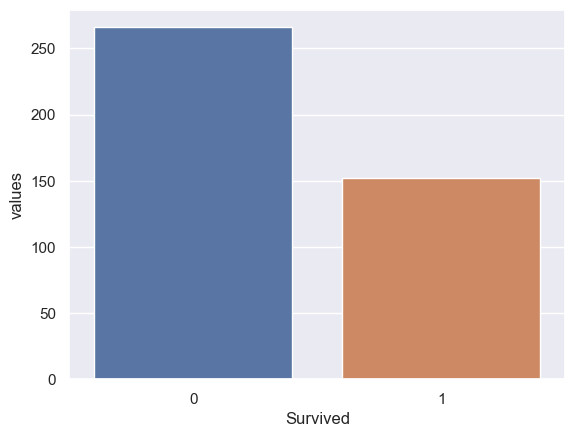

In [6]:
# Checking for data imbalance

temp = titanic_df['Survived'].value_counts()    # Counts the number of ones and zeroes in the column
temp_df = pd.DataFrame({'Survived' : temp.index, 'values' : temp.values})    # Creating a data frame with value and their counts
sns.barplot(x = 'Survived', y = 'values', data = temp_df)
plt.show()

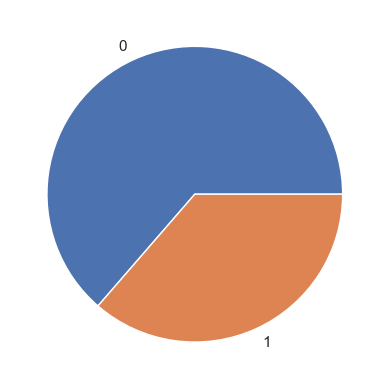

In [7]:
plt.pie(temp_df['values'], labels = [0, 1])
plt.show()

In [8]:
# print(temp_df)
# print(temp_df.loc[0][1])
# print(temp_df.loc[1][1])

print("Ratio of survived to not survived : ", temp_df.loc[1][1]/temp_df.loc[0][1])

Ratio of survived to not survived :  0.5714285714285714


#### From the above we can see that the data set is balanced, proceeding with the process

In [9]:
# Since we have only one data set, spliting it into train and test (validation)

train_df, validation_df = train_test_split(titanic_df, train_size = 0.75, random_state = 1, stratify = titanic_df['Survived'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
353,1245,0,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,NaN,S
243,1135,0,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
123,1015,0,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S
293,1185,0,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S
298,1190,0,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.5000,NaN,S


In [10]:
validation_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
309,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S
352,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,NaN,S
350,1242,1,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,D10 D12,C


In [11]:
train_df.shape

(313, 12)

In [12]:
validation_df.shape

(105, 12)

In [13]:
# Checking for missing values in the training dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 353 to 183
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  313 non-null    int64  
 1   Survived     313 non-null    int64  
 2   Pclass       313 non-null    int64  
 3   Name         313 non-null    object 
 4   Sex          313 non-null    object 
 5   Age          243 non-null    float64
 6   SibSp        313 non-null    int64  
 7   Parch        313 non-null    int64  
 8   Ticket       313 non-null    object 
 9   Fare         313 non-null    float64
 10  Cabin        64 non-null     object 
 11  Embarked     313 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.8+ KB


In [14]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             70
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          249
Embarked         0
dtype: int64

In [15]:
# Checking the percentage of missing values

train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            22.364217
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          79.552716
Embarked        0.000000
dtype: float64

In [16]:
validation_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            16
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin          78
Embarked        0
dtype: int64

In [17]:
# Checking the percentage of missing values

validation_df.isnull().sum()/len(validation_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            15.238095
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.952381
Cabin          74.285714
Embarked        0.000000
dtype: float64

In [18]:
# Droping cabin as significant rows are missing 

train_df = train_df.drop(['Cabin'], axis = 1)
validation_df = validation_df.drop(['Cabin'], axis = 1)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
353,1245,0,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,S
243,1135,0,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,S
123,1015,0,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,S
293,1185,0,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,S
298,1190,0,1,"Loring, Mr. Joseph Holland",male,30.0,0,0,113801,45.5000,S


In [19]:
validation_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
309,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,S
352,1244,0,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,S
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C
140,1032,1,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9000,S
350,1242,1,1,"Greenfield, Mrs. Leo David (Blanche Strouse)",female,45.0,0,1,PC 17759,63.3583,C


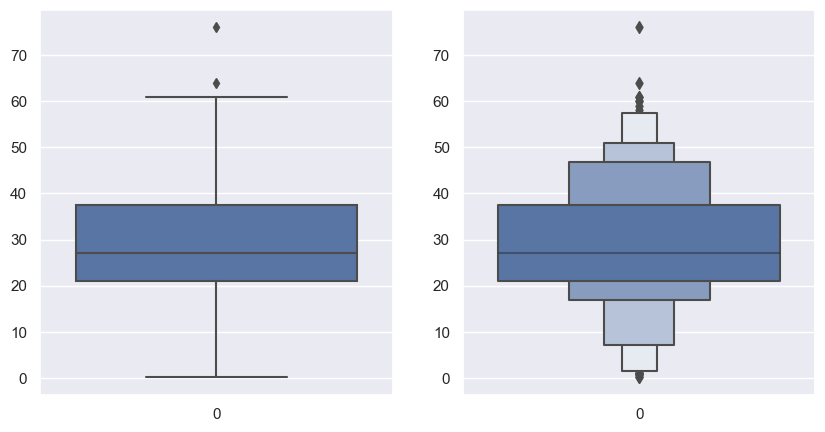

In [20]:
# Checking for outliers before imputing
# Outliers in training dataset

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(train_df['Age'])

plt.subplot(1, 2, 2)
sns.boxenplot(train_df['Age'])

plt.show()

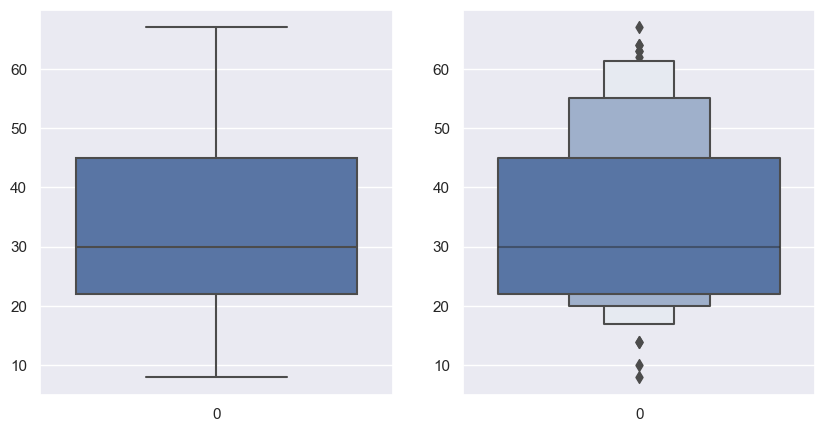

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(validation_df['Age'].values)

plt.subplot(1, 2, 2)
sns.boxenplot(validation_df['Age'].values)

plt.show()

In [22]:
# There are a few outliers in train and no outliers in validattion datasets, so imputing with median

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 353 to 183
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  313 non-null    int64  
 1   Survived     313 non-null    int64  
 2   Pclass       313 non-null    int64  
 3   Name         313 non-null    object 
 4   Sex          313 non-null    object 
 5   Age          313 non-null    float64
 6   SibSp        313 non-null    int64  
 7   Parch        313 non-null    int64  
 8   Ticket       313 non-null    object 
 9   Fare         313 non-null    float64
 10  Embarked     313 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 37.4+ KB


In [23]:
# Imputing with the median of training dataset in validation

validation_df['Age'] = validation_df['Age'].fillna(train_df['Age'].median())
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 309 to 286
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  105 non-null    int64  
 1   Survived     105 non-null    int64  
 2   Pclass       105 non-null    int64  
 3   Name         105 non-null    object 
 4   Sex          105 non-null    object 
 5   Age          105 non-null    float64
 6   SibSp        105 non-null    int64  
 7   Parch        105 non-null    int64  
 8   Ticket       105 non-null    object 
 9   Fare         104 non-null    float64
 10  Embarked     105 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 9.8+ KB


In [24]:
# Imputing fare with the median of training dataset in validation

validation_df['Fare'] = validation_df['Fare'].fillna(train_df['Fare'].median())
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 309 to 286
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  105 non-null    int64  
 1   Survived     105 non-null    int64  
 2   Pclass       105 non-null    int64  
 3   Name         105 non-null    object 
 4   Sex          105 non-null    object 
 5   Age          105 non-null    float64
 6   SibSp        105 non-null    int64  
 7   Parch        105 non-null    int64  
 8   Ticket       105 non-null    object 
 9   Fare         105 non-null    float64
 10  Embarked     105 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 9.8+ KB


#### There are no missing values in the dataset now

In [25]:
# Encoding all the object datatype variables

obj_list = train_df.select_dtypes(include = ['object']).columns.tolist()
print(obj_list)

['Name', 'Sex', 'Ticket', 'Embarked']


In [26]:
# Checking the unique values in each object column to decide if we need to use them or not

for i in obj_list:
    print("Unique values in training dataset for %s column is: %s" % (i, train_df[i].nunique()))

Unique values in training dataset for Name column is: 313
Unique values in training dataset for Sex column is: 2
Unique values in training dataset for Ticket column is: 281
Unique values in training dataset for Embarked column is: 3


In [27]:
# Droping the insignificant and more diverse object variables

train_df = train_df.drop(['Name', 'Ticket'], axis = 1)
validation_df = validation_df.drop(['Name', 'Ticket'], axis = 1)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
353,1245,0,2,male,49.0,1,2,65.0000,S
243,1135,0,3,male,27.0,0,0,7.8875,S
123,1015,0,3,male,28.0,0,0,7.2500,S
293,1185,0,1,male,53.0,1,1,81.8583,S
298,1190,0,1,male,30.0,0,0,45.5000,S


In [28]:
validation_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
309,1201,1,3,female,45.0,1,0,14.1083,S
352,1244,0,2,male,18.0,0,0,73.5000,S
74,966,1,1,female,35.0,0,0,211.5000,C
140,1032,1,3,female,10.0,5,2,46.9000,S
350,1242,1,1,female,45.0,0,1,63.3583,C


In [29]:
# Proceeding with encoding
# Label encoder on Sex column

train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'] = train_df['Sex'].cat.codes

validation_df['Sex'] = validation_df['Sex'].astype('category')
validation_df['Sex'] = validation_df['Sex'].cat.codes

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
353,1245,0,2,1,49.0,1,2,65.0000,S
243,1135,0,3,1,27.0,0,0,7.8875,S
123,1015,0,3,1,28.0,0,0,7.2500,S
293,1185,0,1,1,53.0,1,1,81.8583,S
298,1190,0,1,1,30.0,0,0,45.5000,S


In [30]:
validation_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
309,1201,1,3,0,45.0,1,0,14.1083,S
352,1244,0,2,1,18.0,0,0,73.5000,S
74,966,1,1,0,35.0,0,0,211.5000,C
140,1032,1,3,0,10.0,5,2,46.9000,S
350,1242,1,1,0,45.0,0,1,63.3583,C


In [31]:
# ONE HOT encoder on Embarked column

train_df = pd.get_dummies(train_df, columns = ['Embarked'])
validation_df = pd.get_dummies(validation_df, columns = ['Embarked'])

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
353,1245,0,2,1,49.0,1,2,65.0000,0,0,1
243,1135,0,3,1,27.0,0,0,7.8875,0,0,1
123,1015,0,3,1,28.0,0,0,7.2500,0,0,1
293,1185,0,1,1,53.0,1,1,81.8583,0,0,1
298,1190,0,1,1,30.0,0,0,45.5000,0,0,1


In [32]:
validation_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
309,1201,1,3,0,45.0,1,0,14.1083,0,0,1
352,1244,0,2,1,18.0,0,0,73.5000,0,0,1
74,966,1,1,0,35.0,0,0,211.5000,1,0,0
140,1032,1,3,0,10.0,5,2,46.9000,0,0,1
350,1242,1,1,0,45.0,0,1,63.3583,1,0,0


#### Now there are no variables of object datatype in our dataframe, now we can feed it to the model

In [33]:
train_df.shape

(313, 11)

In [34]:
validation_df.shape

(105, 11)

IndexError: list index out of range

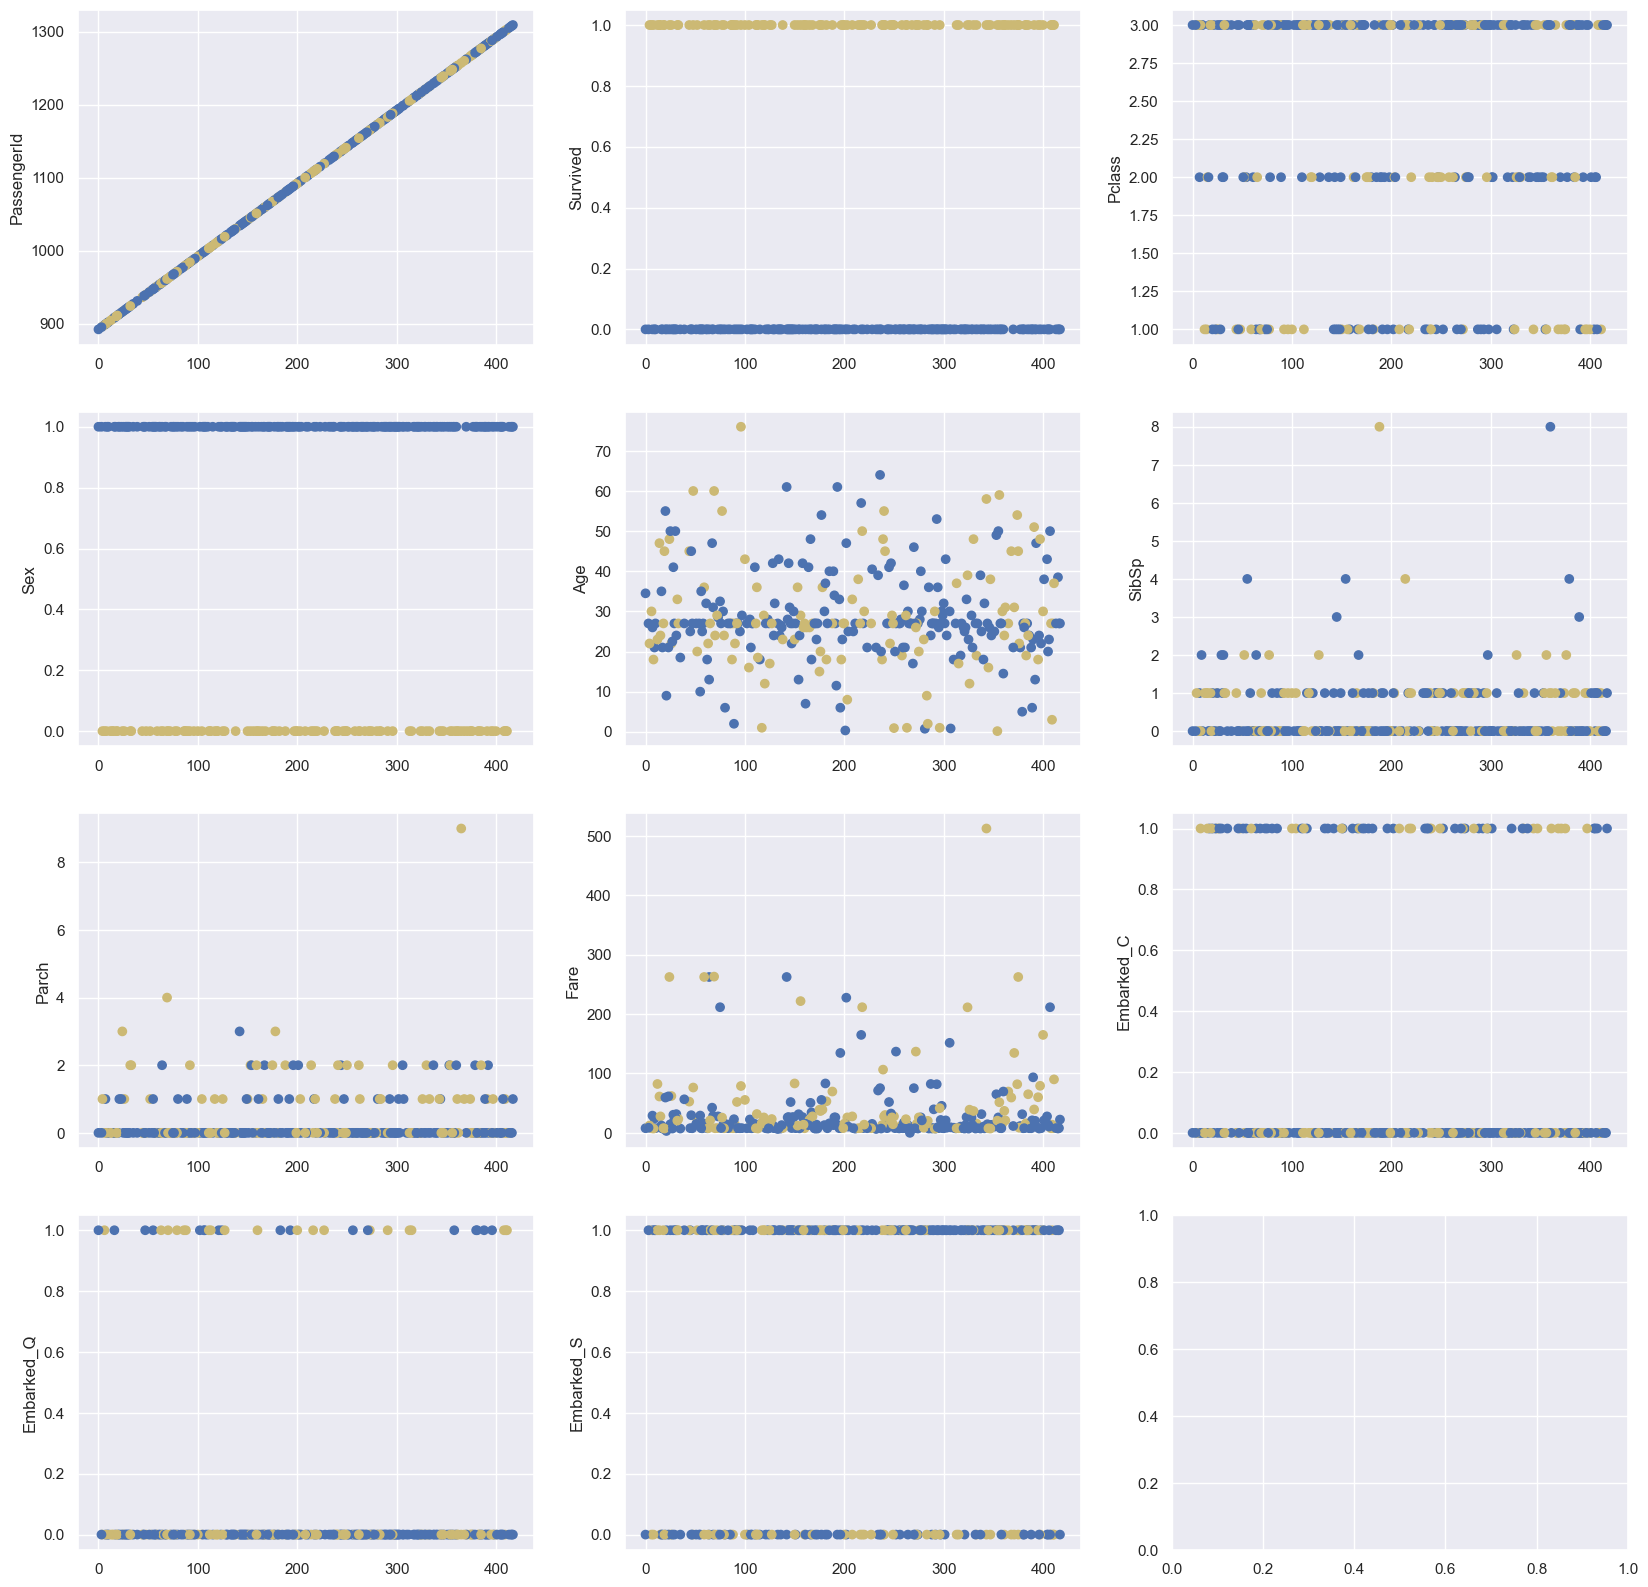

In [35]:
# Exploratory data analysis
# Exploring the signficance of every variable
# Visualising the data to understand the significance

numeric_cols = train_df.select_dtypes(include = np.number)
col_names = list(numeric_cols.columns)
col_index = 0
plt_rows = 4
plt_cols = 3

fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (20, 20))

for row_count in range(plt_rows):
    for col_count in range(plt_cols):
        ax[row_count][col_count].scatter(y = train_df[col_names[col_index]], x = train_df.index, c = np.array(['b' , 'y'])[train_df['Survived']])
        ax[row_count][col_count].set_ylabel(col_names[col_index])
        col_index += 1

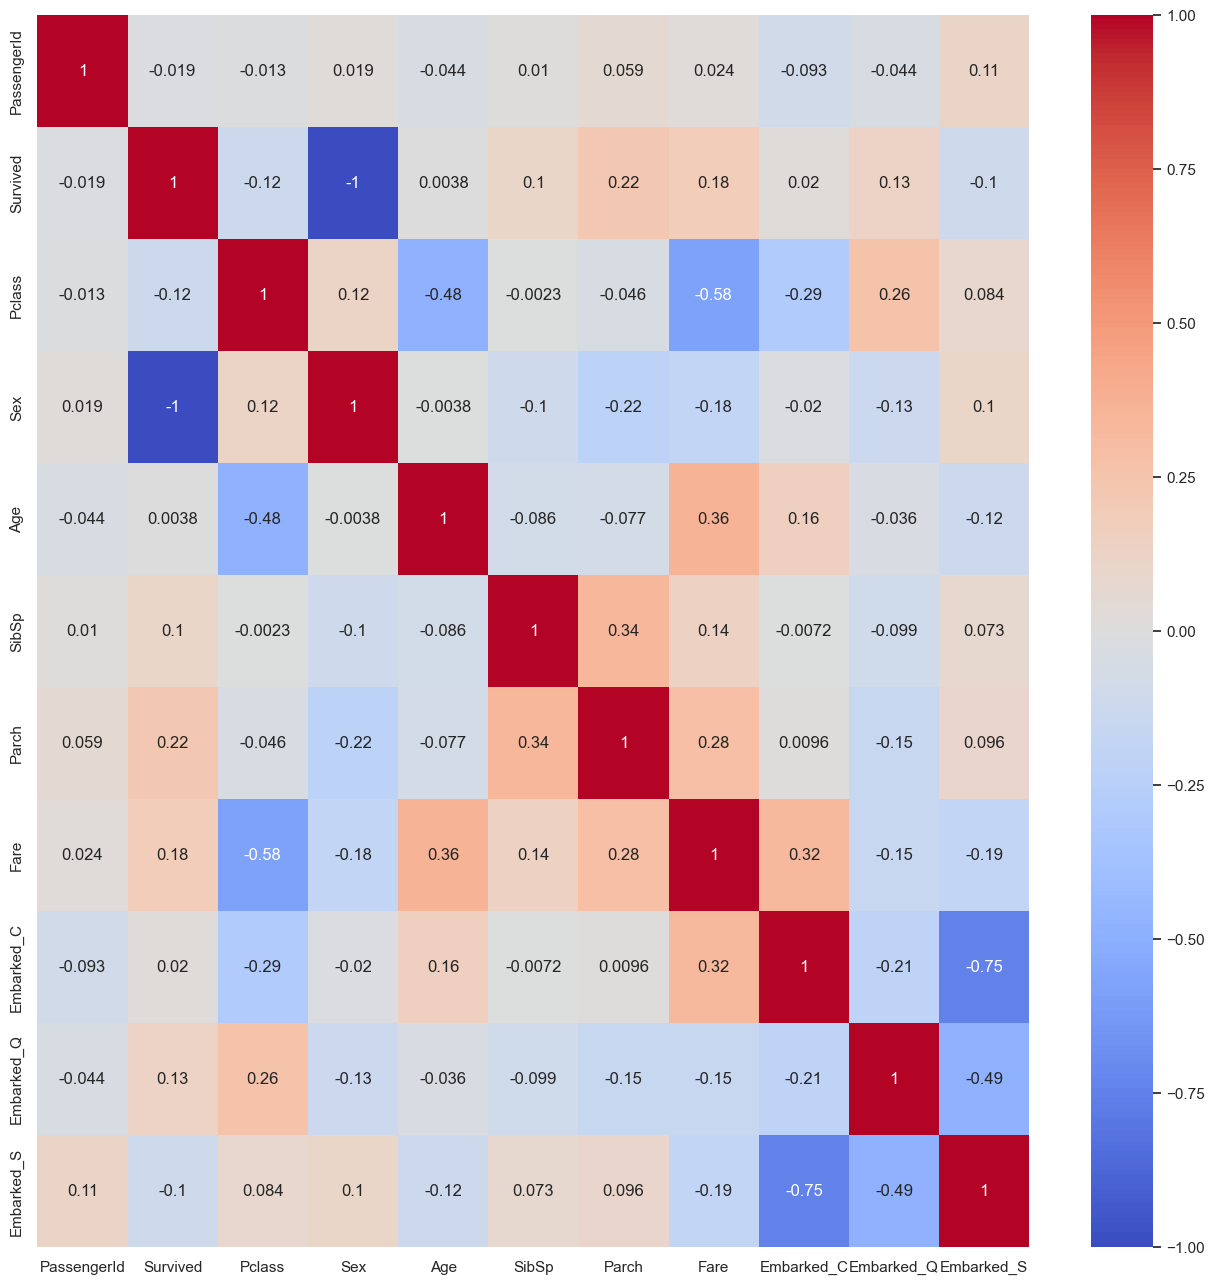

In [36]:
# Checking the heat map

plt.figure(figsize = (16,16))
sns.heatmap(train_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [37]:
# Trying the pandas profiling detailed report feature

dtale.show(train_df)

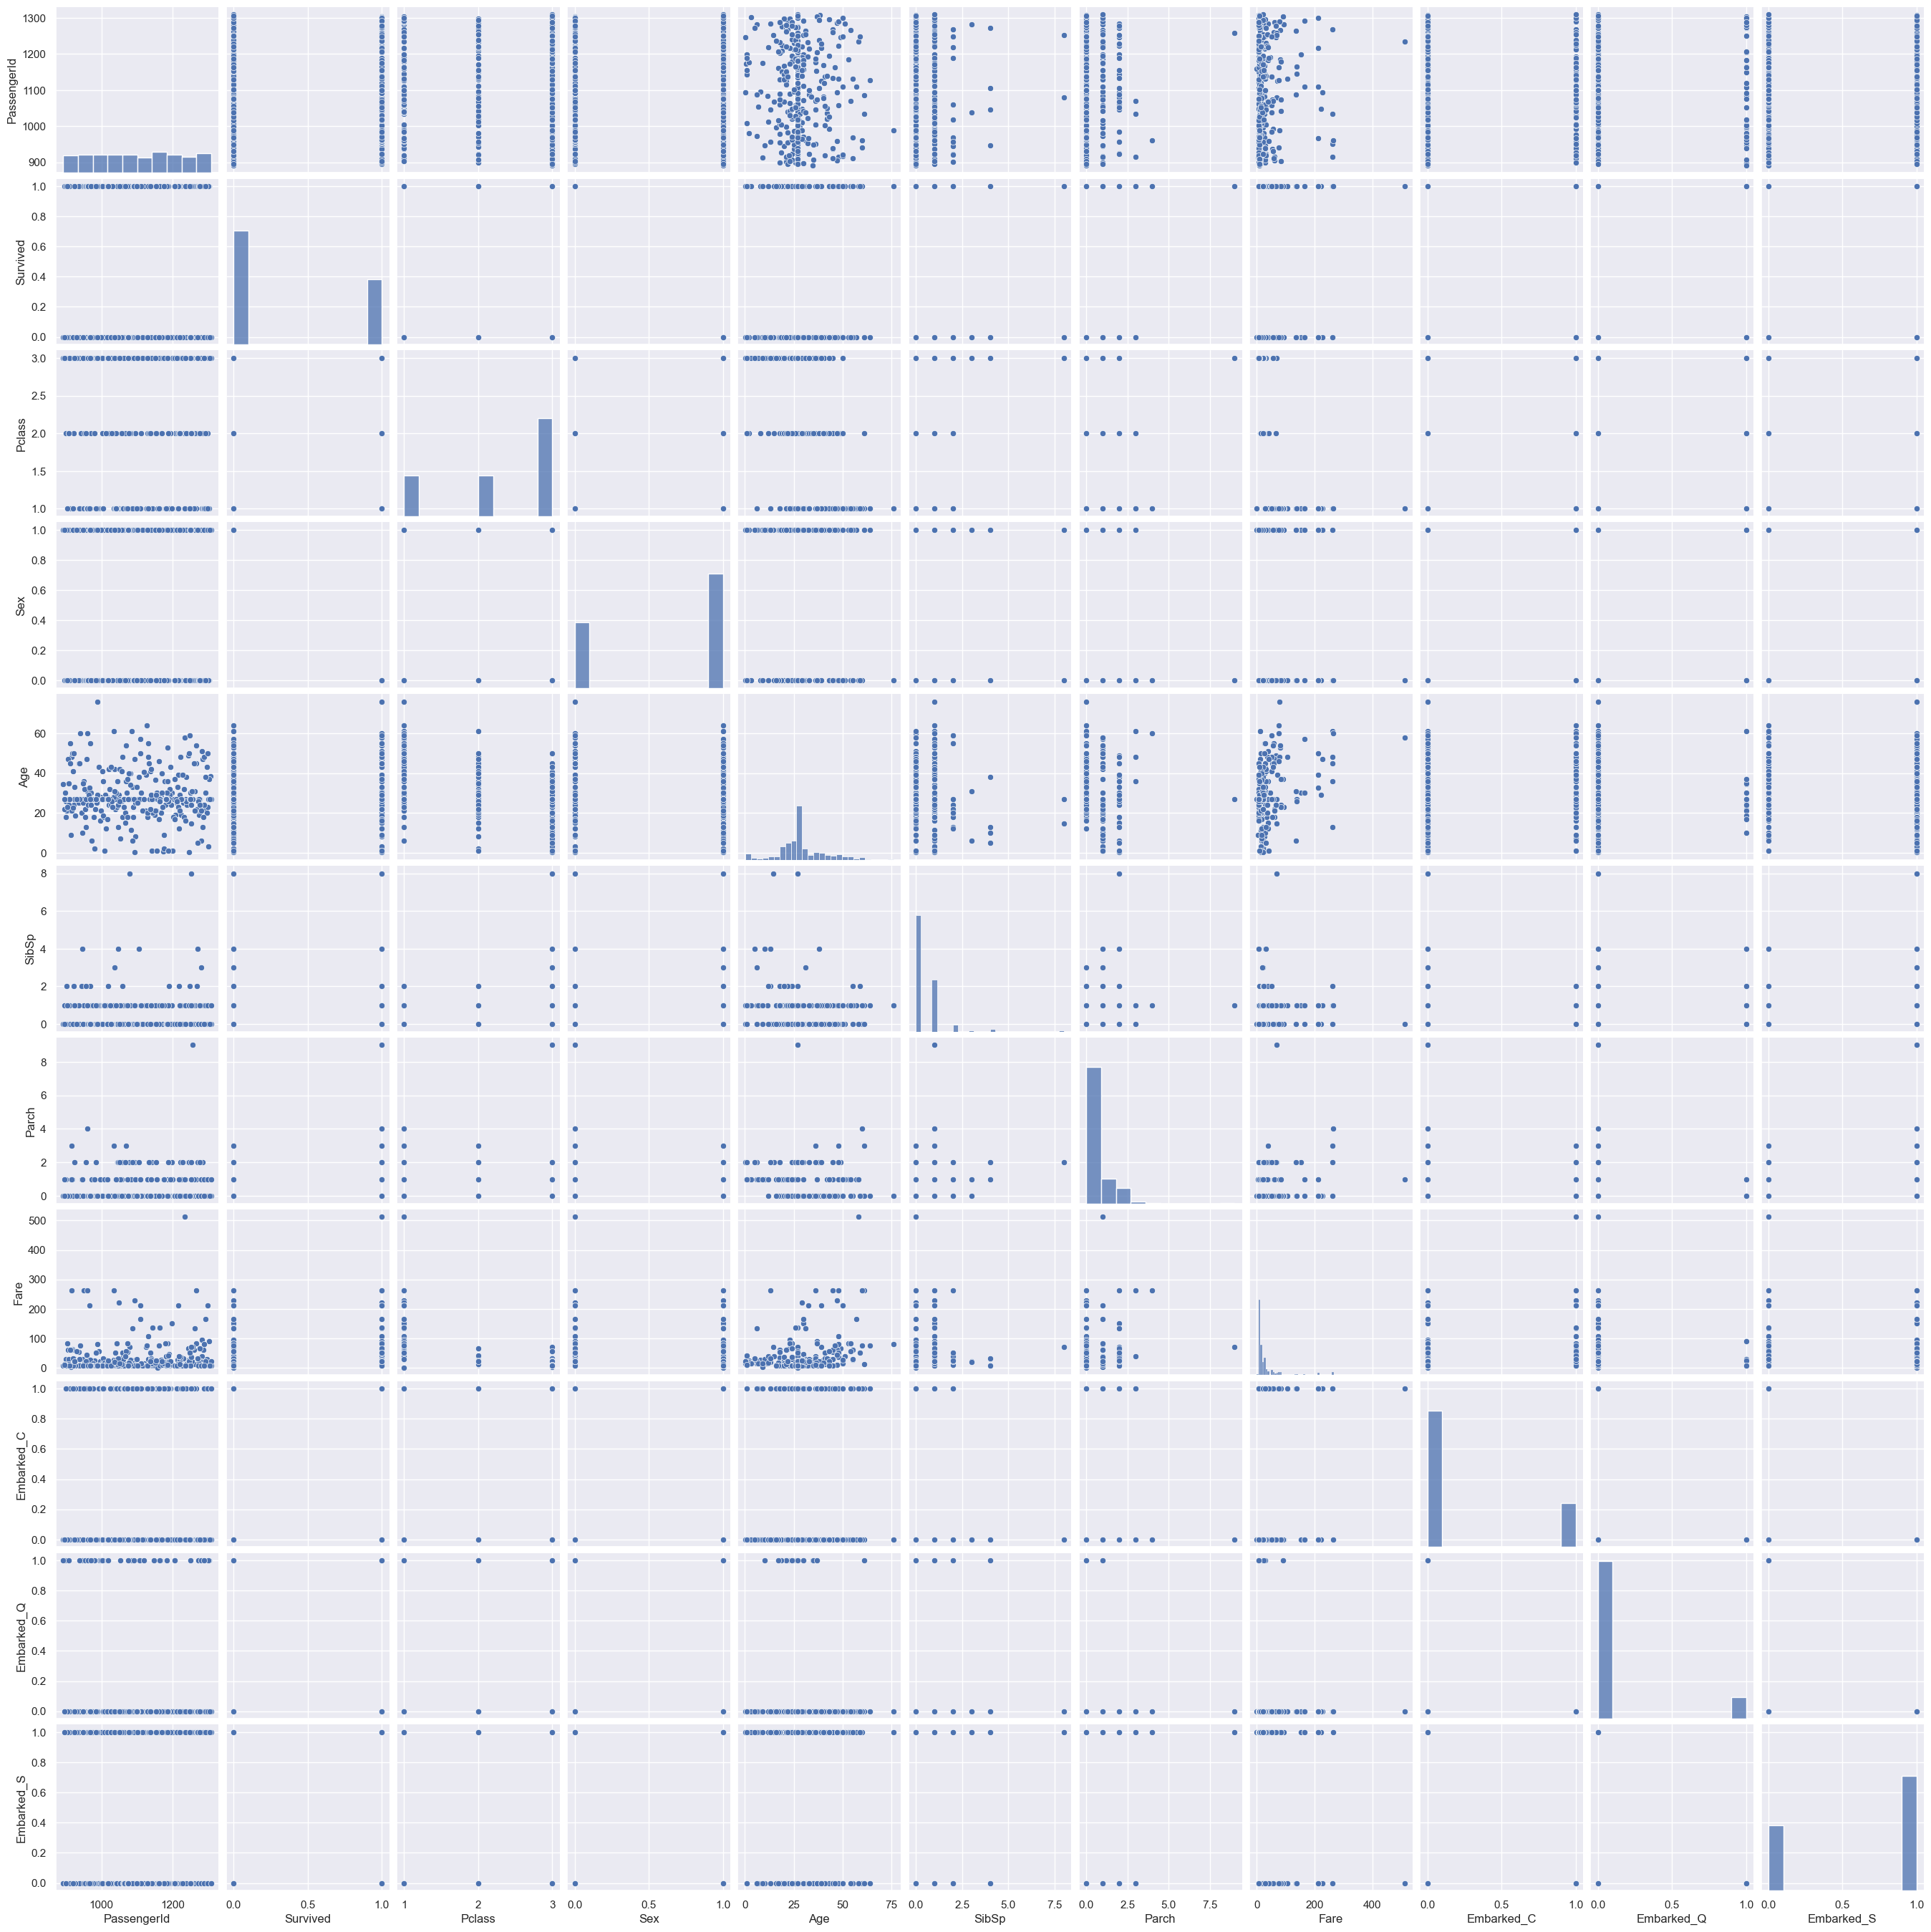

In [38]:
sns.pairplot(train_df)

#### From the above explorations we can coclude the following 
1. The data is biased as it contains only the details of female passengers who survived and male passengers who did not survive
2. We can clearly see 100% correlation between sex and survival.
3. We can conclude that the passenger id is insignificant as the correlation is very small, so it can be dropped.
4. We can also conclude that any one of the embarked_C or embarked_S column can be droped for two reasons, it has a high negative correlation with embarked_Q and the correlation with survival rate is very low.
5. We can also see that Age is also insignificant as the corellation is very low also.
6. In this dataset survival is purely based on the sex of the passenger.
7. Which ever model we try the result will be based on sex and if sex colmn is removed, accuracy of the result is going to be very low.

In [39]:
# Removing the passenger id column before building any model

train_df = train_df.drop(['PassengerId'], axis = 1)
validation_df = validation_df.drop(['PassengerId'], axis = 1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
353,0,2,1,49.0,1,2,65.0000,0,0,1
243,0,3,1,27.0,0,0,7.8875,0,0,1
123,0,3,1,28.0,0,0,7.2500,0,0,1
293,0,1,1,53.0,1,1,81.8583,0,0,1
298,0,1,1,30.0,0,0,45.5000,0,0,1


In [40]:
validation_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
309,1,3,0,45.0,1,0,14.1083,0,0,1
352,0,2,1,18.0,0,0,73.5000,0,0,1
74,1,1,0,35.0,0,0,211.5000,1,0,0
140,1,3,0,10.0,5,2,46.9000,0,0,1
350,1,1,0,45.0,0,1,63.3583,1,0,0


In [41]:
# Splitting dependent and independent variable

raw_x_train = train_df.drop(['Survived'], axis = 1)
raw_y_train = train_df['Survived']

raw_x_val = validation_df.drop(['Survived'], axis = 1)
raw_y_val = validation_df['Survived']

raw_x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
353,2,1,49.0,1,2,65.0000,0,0,1
243,3,1,27.0,0,0,7.8875,0,0,1
123,3,1,28.0,0,0,7.2500,0,0,1
293,1,1,53.0,1,1,81.8583,0,0,1
298,1,1,30.0,0,0,45.5000,0,0,1


In [42]:
# Building various classifications models on raw data
# Building Logistic Regression model

logit_model = LogisticRegression()
logit_model.fit(raw_x_train, raw_y_train)

LogisticRegression()

In [53]:
# Predicting with the built logit model

lr_raw_y_pred_train = logit_model.predict(raw_x_train)
lr_raw_y_pred_val = logit_model.predict(raw_x_val)

In [54]:
lr_raw_y_pred_val

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [55]:
# Evaluating the model

print("Confusion Matrix (Logistic Regression - Raw data)")
print(confusion_matrix(raw_y_train, lr_raw_y_pred_train))
print("**************"*5)
print(confusion_matrix(raw_y_val, lr_raw_y_pred_val))

Confusion Matrix (Logistic Regression - Raw data)
[[199   0]
 [  0 114]]
**********************************************************************
[[67  0]
 [ 0 38]]


In [56]:
print("Classification Report (Logistic Regression - Raw data)")
print(classification_report(raw_y_train, lr_raw_y_pred_train))
print("**************"*5)
print(classification_report(raw_y_val, lr_raw_y_pred_val))

Classification Report (Logistic Regression - Raw data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00       114

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

**********************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [57]:
print("Accuracy Score (Logistic Regression - Raw Data)")
print(accuracy_score(raw_y_train, lr_raw_y_pred_train))
print("**************"*5)
print(accuracy_score(raw_y_val, lr_raw_y_pred_val))

Accuracy Score (Logistic Regression - Raw Data)
1.0
**********************************************************************
1.0


In [59]:
# Removing the variables Sex and Embarked_C

corrt_x_train = train_df.drop(['Survived', 'Sex', 'Embarked_C'], axis = 1)
corrt_y_train = train_df['Survived']

corrt_x_val = validation_df.drop(['Survived', 'Sex', 'Embarked_C'], axis = 1)
corrt_y_val = validation_df['Survived']

corrt_x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
353,2,49.0,1,2,65.0000,0,1
243,3,27.0,0,0,7.8875,0,1
123,3,28.0,0,0,7.2500,0,1
293,1,53.0,1,1,81.8583,0,1
298,1,30.0,0,0,45.5000,0,1


In [60]:
# Building the logistic regression model

logit_model.fit(corrt_x_train, corrt_y_train)

LogisticRegression()

In [62]:
# Predicting with the built logit model

lr_corrt_y_pred_train = logit_model.predict(corrt_x_train)
lr_corrt_y_pred_val = logit_model.predict(corrt_x_val)

lr_corrt_y_pred_val

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
# Evaluating the model

print("Confusion Matrix (Logistic Regression - Correlation treated data)")
print(confusion_matrix(corrt_y_train, lr_corrt_y_pred_train))
print("**************"*5)
print(confusion_matrix(corrt_y_val, lr_corrt_y_pred_val))

Confusion Matrix (Logistic Regression - Correlation treated data)
[[179  20]
 [ 86  28]]
**********************************************************************
[[60  7]
 [29  9]]


In [64]:
print("Classification Report (Logistic Regression - Correlation treated data)")
print(classification_report(corrt_y_train, lr_corrt_y_pred_train))
print("**************"*5)
print(classification_report(corrt_y_val, lr_corrt_y_pred_val))

Classification Report (Logistic Regression - Raw data)
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       199
           1       0.58      0.25      0.35       114

    accuracy                           0.66       313
   macro avg       0.63      0.57      0.56       313
weighted avg       0.64      0.66      0.62       313

**********************************************************************
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        67
           1       0.56      0.24      0.33        38

    accuracy                           0.66       105
   macro avg       0.62      0.57      0.55       105
weighted avg       0.63      0.66      0.61       105



In [66]:
print("Accuracy Score (Logistic Regression - Correlation treated data)")
print(accuracy_score(corrt_y_train, lr_corrt_y_pred_train))
print("**************"*5)
print(accuracy_score(corrt_y_val, lr_corrt_y_pred_val))

Accuracy Score (Logistic Regression - Correlation treated data)
0.6613418530351438
**********************************************************************
0.6571428571428571
